In [57]:
import os
import pandas as pd

df_list = []
for filename in os.listdir("/home/frankwoods/Desktop/lassie/data/mhxx_raw_data"):
    # creates dataframe holding entire csv
    df = pd.read_csv(f"/home/frankwoods/Desktop/lassie/data/mhxx_raw_data/{filename}")
    # takes just the two important columns
    df = df[['toeforce_y', 'toe_position_y']]
    df.columns = ["resistance", "depth"] # rename columns
    df_list.append(df)
print(f"example: {df_list[0]}")


example:        resistance     depth
0        3.591901 -0.166840
1        3.183853 -0.166840
2        3.839515 -0.166842
3        3.301737 -0.166842
4        3.676693 -0.166845
...           ...       ...
17747    4.151430 -0.160444
17748    5.946085 -0.160445
17749    7.428076 -0.160444
17750    3.787594 -0.160444
17751    4.444571 -0.160443

[17752 rows x 2 columns]


# Initial Data Visualization and Summary

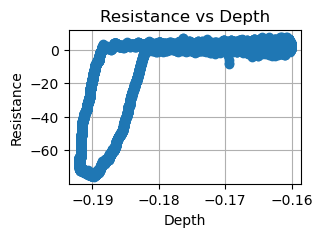

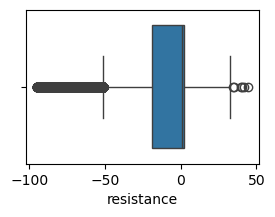

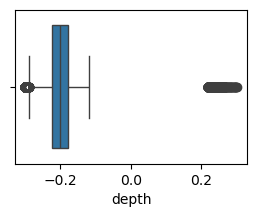

In [58]:


import seaborn as sns
import matplotlib.pyplot as plt

# ---- plot an example graph ----
# Assume you have a DataFrame df with columns 'depth' and 'resistance'
def visualize_data(df_list, graph=False, save_all_graphs=False, save_all_graphs_location="", box_plots=False, histograms=False, graph_i=1):
    if graph:
        plt.figure(figsize=(3,2))         # Optional: set figure size
        plt.plot(df_list[graph_i]['depth'], df_list[graph_i]['resistance'], marker='o', linestyle='-')
        plt.xlabel('Depth')
        plt.ylabel('Resistance')
        plt.title('Resistance vs Depth')
        plt.grid(True)                    
        plt.show()
    
    if save_all_graphs and len(save_all_graphs_location) > 0:
        for i, df in enumerate(df_list):
            plt.figure(figsize=(3,2))         # Optional: set figure size
            plt.plot(df['depth'], df['resistance'], marker='o', linestyle='-')
            plt.xlabel('Depth (m)')
            plt.ylabel('Resistance (N)')
            plt.title('Resistance vs Depth')
            plt.grid(True)
            plt.savefig(f"{save_all_graphs_location}{i}")
            plt.close()

    df_combined_row_wise = pd.concat(df_list, axis=0)
    if box_plots:
        plt.figure(figsize=(3,2))         # Optional: set figure size
        # ---- resistance ----
        sns.boxplot(x=df_combined_row_wise['resistance'])
        plt.show()
        resistance_series = df_combined_row_wise['resistance']
        # ---- depth ----
        plt.figure(figsize=(3,2))         # Optional: set figure size
        sns.boxplot(x=df_combined_row_wise['depth'])
        plt.show()
    if histograms:
        plt.hist(df_combined_row_wise["resistance"], bins=30, density=True)
        plt.title("Resistance Histogram")
        plt.show()

        plt.hist(df_combined_row_wise["depth"], bins=30, density=True)
        plt.title("Depth Histogram")
        plt.show()


visualize_data(df_list, graph=True, save_all_graphs=True, graph_i=4, save_all_graphs_location="data/mhxx_raw_data_visual/depth_res_", box_plots=True)

# Flip curve over y-axis and x-axis

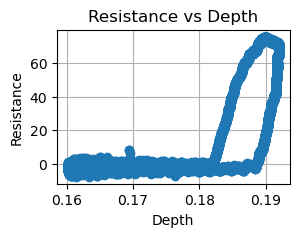

In [59]:
def flip_over_x_and_y_axis(df_list):
    cleaned_df_list = []
    for df in df_list:
        copy_df = df.copy()
        copy_df['depth'] = -copy_df['depth']
        copy_df['resistance'] = -copy_df['resistance']
        cleaned_df_list.append(copy_df)
    return cleaned_df_list

df_list = flip_over_x_and_y_axis(df_list)
visualize_data(df_list, graph=True, graph_i=4)

# Remove all data points after the max depth

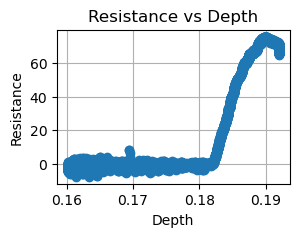

In [60]:
def remove_points_after_max_depth(df_list):
    cleaned_list = []
    for i, df in enumerate(df_list):
        end_idx = df[df["depth"] == df["depth"].max()].index[0]
        cleaned_df = df.iloc[:end_idx+1]
        cleaned_list.append(cleaned_df)
    return cleaned_list

df_list = remove_points_after_max_depth(df_list)
visualize_data(df_list, graph=True, graph_i=4)

# Start each graphs depth when arm first contacts the ground

90


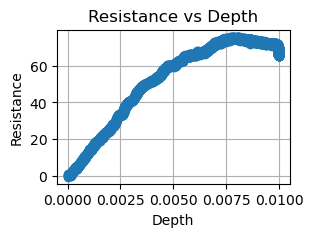

In [61]:
# Hard coded visual start of curve
depth_cutoff = [0, 0.217, 0.226, 0.255, 0.182, 0.226, 0.231, 0.1957, 0.208, 0.223,
                0.241, 0.188, 0.1956, 0.19, 0, 0.214, 0.206, 0.240, 0.211, 0,
                0.195, 0.202, 0.230, 0, 0.167, 0.190, 0, 0.180, 0.225, 0.225,
                0.216, 0.198, 0.250, 0.196, 0.216, 0, 0, 0, 0, 0,
                0.211, 0.176, 0.27, 0.205, 0.205, 0, 0, 0.198, 0.209, 0,
                0, 0.199, 0.244, 0, 0.176, 0.195, 0.199, 0.20, 0, 0.273,
                0.22, 0.199, 0.223, 0.176, 0.217, 0, 0.206, 0.212, 0.20, 0.21,
                0.208, 0.21, 0.19, 0.235, 0, 0.20, 0.21, 0.18, 0.1775, 0,
                0.201, 0.196, 0.22, 0.21, 0.194, 0.223, 0.218, 0.22, 0.201, 0.227]
print(len(depth_cutoff))

def rm_data_prior_to_arm_penetration(df_list, depth_cutoff):
    cleaned_df_list = []
    for i, df in enumerate(df_list):
        copy_df = df.copy()
        copy_df = copy_df[copy_df["depth"] > depth_cutoff[i]]
        copy_df["depth"] = copy_df["depth"] - depth_cutoff[i]
        cleaned_df_list.append(copy_df)
    return cleaned_df_list

df_list = rm_data_prior_to_arm_penetration(df_list, depth_cutoff)
visualize_data(df_list, graph=True, graph_i=4)

# Remove bad samples

In [62]:
def remove_bad_samples(df_list, remove_list):
    cleaned_samples_list = []
    for i, df in enumerate(df_list):
        if i not in remove_list:
            cleaned_samples_list.append(df)
    return cleaned_samples_list

remove_list = [0, 14, 19, 23, 26, 35, 36, 37, 38, 39, 45, 46, 47, 49, 50, 53, 58, 65, 74, 79]
df_list = remove_bad_samples(df_list, remove_list)
print(f"df_list length: {len(df_list)}")
print("bad samples removed")

df_list length: 70
bad samples removed


# save photos of all cleaned curves

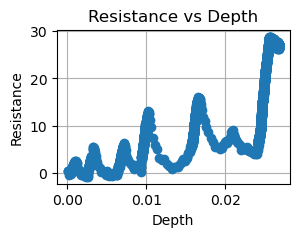

In [63]:
visualize_data(df_list, graph=True, save_all_graphs=True, save_all_graphs_location="data/mhxx_processed_data_visual/depth_res_")

# Save the cleaned csv files

In [64]:
def save_data_csv(final_df_list, save: bool):
    if save:
        for i in range(len(final_df_list)):
            final_df_list[i].to_csv(f"/home/frankwoods/Desktop/lassie/data/mhxx_processed_data/resistance_depth_{i}.csv")

save_data_csv(df_list, save=True)